# Capitulo 2 : Aprendizado Supervisionado

Se o modelo atingiu a acurácia adequada então podemos generalizar o y de predição para o y de teste.
Chama-se overfitting quando o modelo está muito complexo e o número de samples é muito reduzido para a complexidade do modelo.
Quando se está em overfitting não se pode generalizar o modelo. 

Se um modelo é muito simples, como por exemplo "Todas as pessoas com mais de 60" compram barcos então existe o underfitting, situação onde não se pode generalizar o modelo, pois as features envolvidas são poucas.

Nesse capítulo iremos ilustrar como funciona os algoritmos supervisionados, podemos separa-los em classificação e regressão.

*  A classificação classifica os samples em alvos que são classes da classificação, exemplo setosa, vertiginosa e e virgínica.
*  A regressão apresenta o target como um ponto flutuante final, como por exemplo a idade de uma pessoa.

### Alguns exemplos de Conjunto de Dados

Definimos um conjunto de dados como sintético quando ele é particular e serve apenas para demonstrar o algoritmo ou para um exemplo específico.

## Exemplo de dados sintéticos para classificador
No conjunto de dados forged temos apenas um conjunto de dados que possui shape de (26,2) ou seja 26 samples por duas features. 


c:\users\sergi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


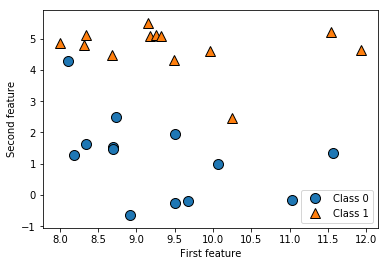

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


Observe que as features ficam nos eixos e as classes são as formas dos pontos. 

## Exemplo de dados sintéticos para uma regressão
Aqui observamos o conjunto de dados wave que tem um simples valor de entrada e um valor contínuo de saída. 


Text(0, 0.5, 'Target')

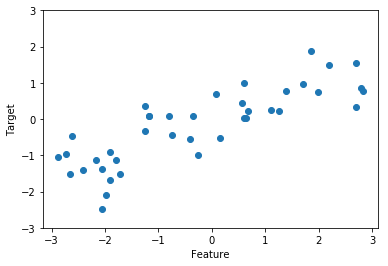

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


A seguir teremos o dataset de classificação de câncer de mama.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("{}".format(cancer['data'].shape))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


Aqui observamos que o conjunto de dados de cancer de mama tem 569 pontos e 30 features.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


Nesta consulta notamos que o cancer de mama tem nos dados que 212 são malignos e 357 são benignos.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

print("Descrenvendo features  = {}", format(cancer['feature_names']))

Descrenvendo features  = {} ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Aqui temos as features envolvidas no modelo.


c:\users\sergi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\sergi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


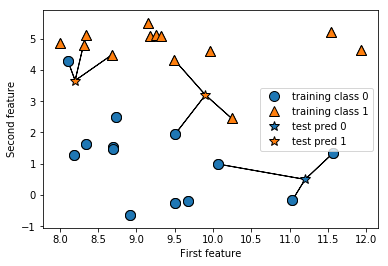

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs


X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.plots.plot_knn_classification(n_neighbors=3)


No plot acima temos que o parametro de plotagem de K-NN quando k vale 3 ele escolhe a moda entre os vizinhos.


c:\users\sergi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Test set accuracy: 0.86


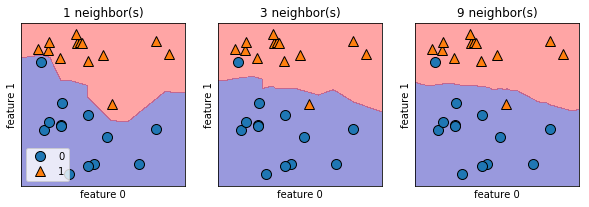

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
# plot dataset
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show();

O teste do código acima resultou em um que ao aumentar o numero de vizinhos produz um modelo ruim, pois conforme o número de vizinhos cresce, a moda tende a se perpetuar. Se houverem poucos vizinhos então o algoritmo produz resultados melhores.


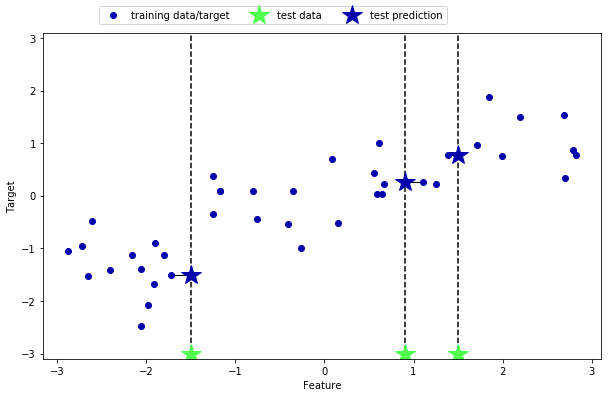

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

mglearn.plots.plot_knn_regression(n_neighbors=1);



Aqui observamos a variação do Algoritmo KNN, o algoritmo de Regressão de KNN, que produz resultados simples como mostrado.

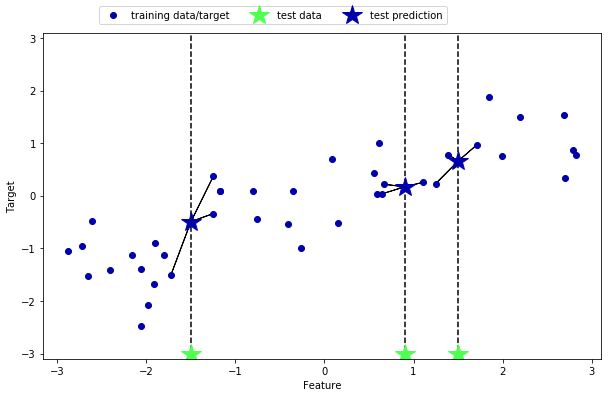

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

mglearn.plots.plot_knn_regression(n_neighbors=3);

Aqui já se observa que há tres vizinhos.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor

# Aqui temos a criação de um dataset com 40 samples
X, y = mglearn.datasets.make_wave(n_samples=40)

# Aqui o modelo é treinado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# O classificador é criado
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


Aqui observamos também que podemos fazer as predições para o conjunto de teste X_test. Observamos também que podemos calcular o score do conjunto de teste, através do método score do classificador.
O Classificador retornou uma acurácia de 83%, que é boa.

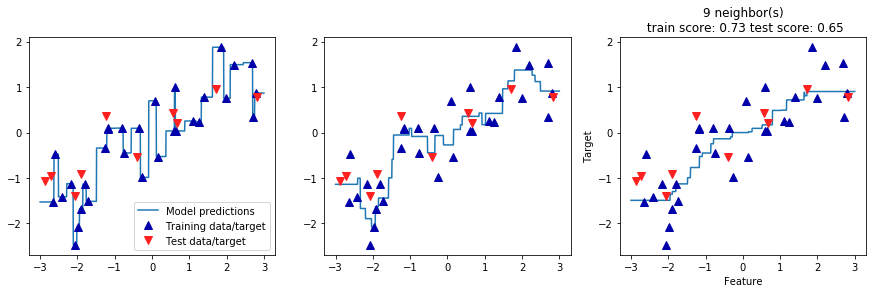

In [25]:
## import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor

# Aqui temos a criação de um dataset com 40 samples
X, y = mglearn.datasets.make_wave(n_samples=40)

# Aqui o modelo é treinado
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3,9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
ax.set_title(
"{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
n_neighbors, reg.score(X_train, y_train),
reg.score(X_test, y_test)))
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

O algorimto compara a predição no classificador KNN com regressão.

O algoritmo do KNN não é muito usado na prática pois se o modelo for muito complexo, tanto em número de samples ou de features a performace é pouca. Observa-se que já com 100 samples o algoritmo não é bom. O ponto forte desse algoritmo é que ele é fácil de se entender e não precisa configurar muitos parâmetros.